[View in Colaboratory](https://colab.research.google.com/github/HAN-AR/VIANOVA-congestion-ix35/blob/master/iX35/ix35_analysis.ipynb)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import datetime
import glob
import sys
import time

%matplotlib inline

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [9]:
summary = pd.read_csv('/content/drive/My Drive/iX35/data/summary.csv')
summary[summary.motorway_streak > '00:30'][['car', 'trip', 'motorway', 'motorway_streak']].reset_index()

,index,car,trip,motorway,motorway_streak
0,11,1,data/iX_35_final_nr1/2015-10-27-16-36-06,00:45:39.000000000,00:42:26.000000000
1,15,1,data/iX_35_final_nr1/2015-11-03-15-56-16,02:06:33.600000000,02:06:33.600000000
2,44,1,data/iX_35_final_nr1/2015-11-25-08-24-52,01:09:02.000000000,00:44:51.000000000
3,54,1,data/iX_35_final_nr1/2015-11-26-13-27-33,00:35:05.000000000,00:34:59.000000000
4,58,1,data/iX_35_final_nr1/2015-12-02-09-11-48,00:57:29.000000000,00:34:48.000000000
5,59,1,data/iX_35_final_nr1/2015-12-02-16-03-33,00:44:15.000000000,00:37:01.000000000
6,65,1,data/iX_35_final_nr1/2015-12-03-13-33-54,00:42:35.000000000,00:38:08.000000000
7,71,1,data/iX_35_final_nr1/2015-12-04-13-23-04,00:51:51.000000000,00:37:39.000000000
8,78,1,data/iX_35_final_nr1/2015-12-08-06-28-29,00:36:28.000000000,00:35:40.000000000
9,80,1,data/iX_35_final_nr1/2015-12-08-14-13-02,00:40:16.000000000,00:37:16.000000000


In [0]:
def count_consecutive(roadlist):
    consecutive = 0
    max_consecutive = 0
    for road in roadlist:
        if road == 'motorway' or road == 'motorway_link':
            consecutive += 1
            if consecutive > max_consecutive:
                max_consecutive = consecutive
        else:
            consecutive = 0
    return max_consecutive

In [0]:
def inrush(timestamp):
    am_rush_start = datetime.time(7,0)
    am_rush_end = datetime.time(9,0)
    pm_rush_start = datetime.time(16,30)
    pm_rush_end = datetime.time(18,30)
    if timestamp.time() > am_rush_start and timestamp.time() < am_rush_end:
        return 1
    if timestamp.time() > pm_rush_start and timestamp.time() < pm_rush_end:
        return 1
    return 0

In [0]:
def count_lanes(roadlanes, amount):
    lanes = 0
    for roadlane in roadlanes:
        if roadlane > amount-1:
            lanes += 1
    return lanes

In [0]:
count = 0 
closed = 0
speeds = []
roads = []
roadlanes = []
filenames = []

total = 0
for filename in os.listdir('data/iX_35_final_nr1'):
    if filename.endswith(".feather"): 
        total += 1
        dirfile = "data/iX_35_final_nr1/" + filename
        data = feather.read_dataframe(dirfile)
        try:
            road = data['road_type']
            roadlane = data['road_lanes']
            if count_lanes(roadlane.tolist(), 2) > 9000:
                roads.append(road.tolist())
                speeds.append(data['speed_km_h'].tolist())
                count +=1
                filenames.append(filename)
                print filename
        except:
            print(filename + " couldn't open")
            closed +=1
print(count)

2017-04-04-04-17-06.feather
2017-04-04-14-17-54.feather
2017-06-13-06-42-28.feather
2017-09-12-06-38-07.feather
2017-04-10-13-48-28.feather
2018-07-26-06-08-39.feather
2018-09-06-14-16-03.feather
2017-04-21-13-22-14.feather
2018-07-12-11-52-33.feather
2017-07-06-14-10-00.feather
2017-06-15-10-37-16.feather
2017-04-03-13-29-03.feather
2018-07-19-08-06-20.feather
2018-07-11-09-14-24.feather
2018-08-28-05-33-16.feather
2018-08-28-16-00-16.feather
2018-06-21-15-28-36.feather
2018-08-09-06-25-43.feather
2017-04-19-06-53-51.feather
2018-03-09-12-15-13.feather
2017-04-05-13-05-06.feather
2017-09-07-05-10-48.feather
2017-09-26-16-18-04.feather
2017-03-10-09-58-24.feather
2017-12-05-15-37-37.feather
2017-03-16-16-30-27.feather
2017-07-17-04-04-14.feather
2017-04-03-03-56-53.feather
2017-09-19-13-38-37.feather
2018-03-27-06-07-33.feather
2018-09-21-11-31-25.feather
2017-03-13-15-42-29.feather
2018-07-19-09-27-44.feather
2018-07-19-15-12-53.feather
2018-03-09-11-10-24.feather
2017-09-29-07-43-04.

In [54]:
start_time = time.time()
trips = []
for i, trip in enumerate(glob.glob('/content/drive/My Drive/iX35/data/iX_35_final_nr*/*.msgpack')):
  if i % 100 == 0: print(i, len(trips))
    
  df = pd.read_msgpack(trip)
  #sys.stdout.write(":%s \r" % (trip,) ); sys.stdout.flush()
  
  if df.road_type.isnull().values.all():
    continue
  
  df[['road_type']] = df[['road_type']].ffill()
  if len(df[df.road_type == 'motorway']) > 9000:
    trips.append(trip)

print("--- %s seconds ---" % (time.time() - start_time))

(0, 0)
(100, 26)
(200, 59)
(300, 90)
(400, 115)
(500, 141)
(600, 161)
(700, 176)
(800, 177)
(900, 189)
(1000, 196)
(1100, 202)
(1200, 210)
(1300, 224)
(1400, 236)
(1500, 242)
(1600, 248)
(1700, 249)
(1800, 255)
(1900, 259)
--- 538.448872089 seconds ---


In [0]:
filename = filenames[0]
dirfile = "data/iX_35_final_nr1/" + filename
data = feather.read_dataframe(dirfile)
data['rush'] = [inrush(timestamp) for timestamp in data['timestamp']]
roadlist = data['road_type'].tolist()
speedlist = data['speed_km_h'].tolist()
maxspeedlist = data['road_maxspeed'].tolist()
rushlist = data['rush'].tolist()
lataccellist = data['acceleration_latitudinal_g'].tolist()
lonaccellist = data['acceleration_longitudinal_g'].tolist()
timestamplist = data['timestamp'].tolist()

In [0]:
color = []
for i,j,k in zip(speedlist, roadlist, maxspeedlist):
    if not j == 'motorway' and not j == 'motorway_link':
        color.append('red')
    else:
        if i < 0.7* k:
            if j == 'motorway':
                color.append('blue')
            else :
                color.append('purple')
        else:
            color.append('green')

In [0]:
try:
    rushx_start = rushlist.index(1)
    rushx_end = len(rushlist) - rushlist[::-1].index(1) - 1
except:
    rushx_start = 0
    rushx_end = 0

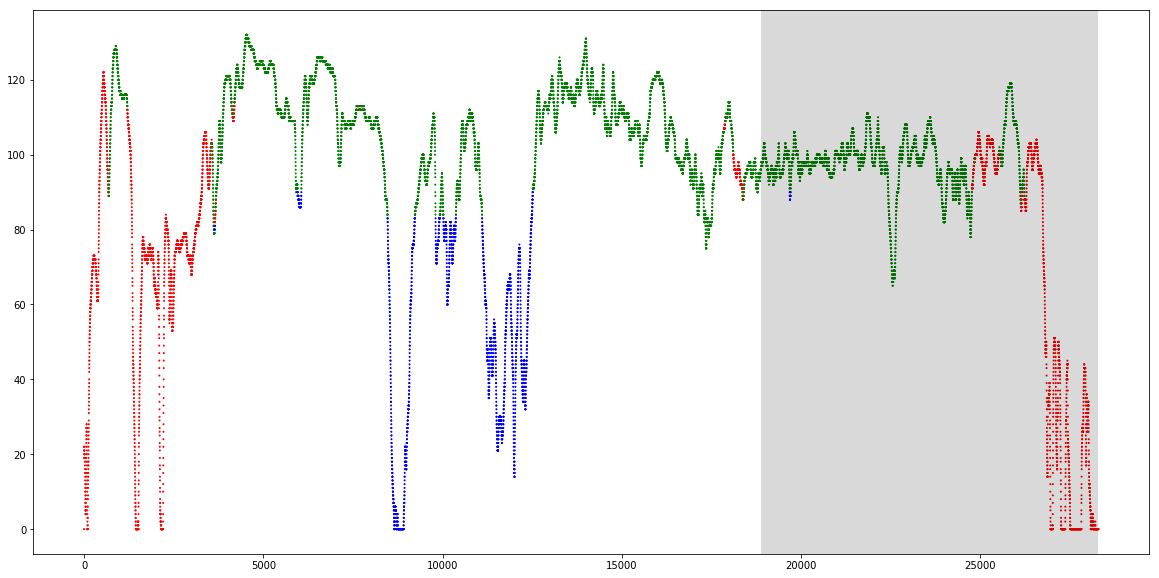

In [0]:
plt.figure(figsize=(20,10))
x = list(range(0, len(speedthisfile)))
plt.axvspan(rushx_start, rushx_end, facecolor='black', alpha=0.15)
plt.scatter(x,speedlist, color=color, s=1)

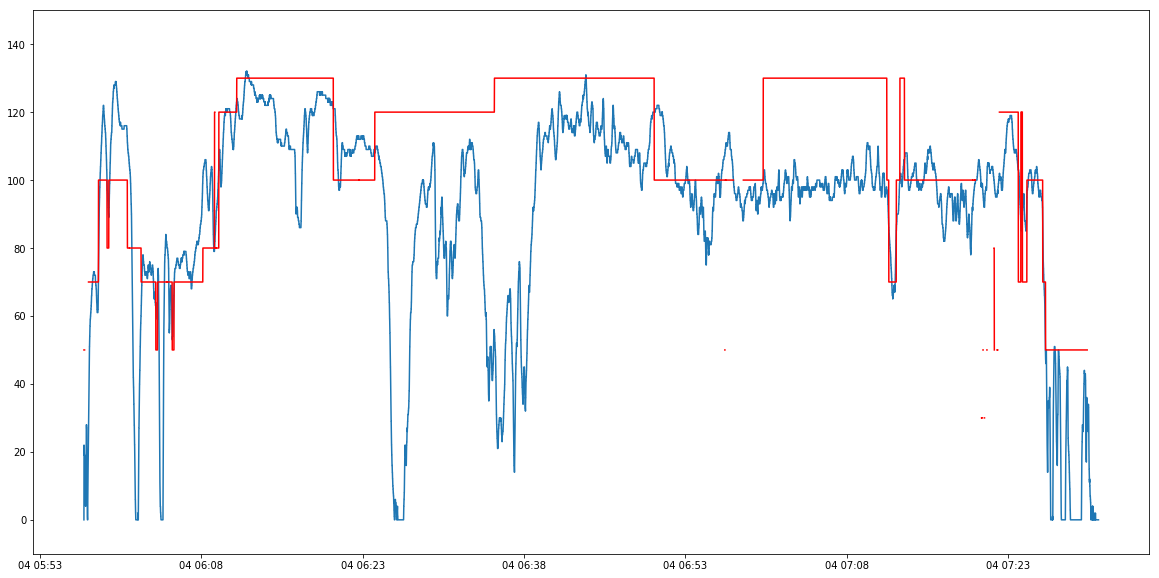

In [0]:
fracspeedlist = np.divide(speedlist,maxspeedlist)*100
plt.figure(figsize=(20,10))
axes = plt.gca()
axes.set_ylim([-10,150])
plt.plot(timestamplist,speedlist)
plt.plot(timestamplist,maxspeedlist, color = 'red')

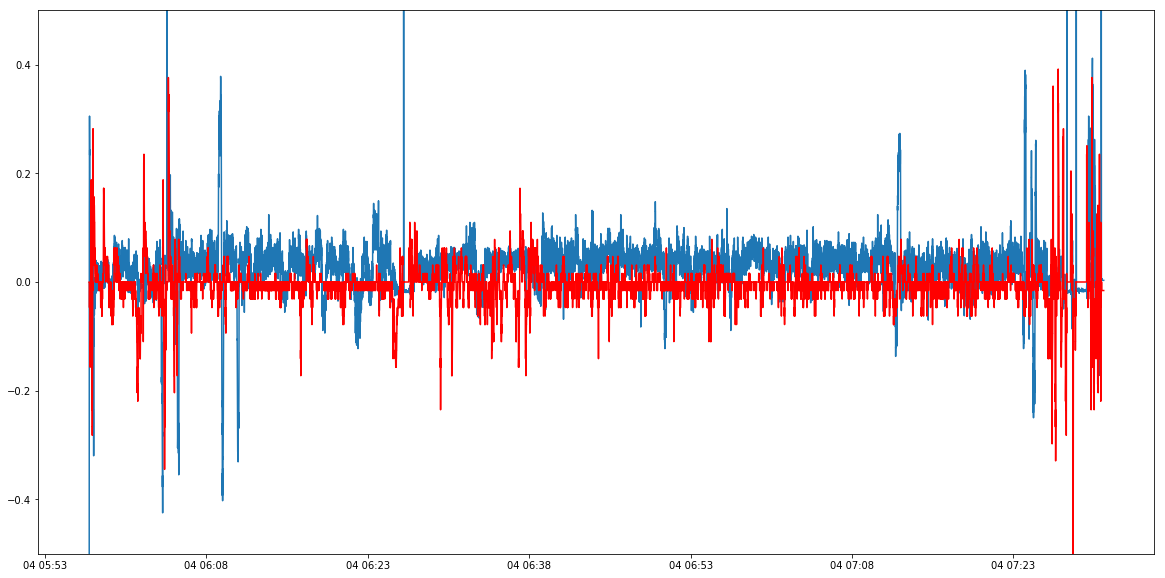

In [0]:
plt.figure(figsize=(20,10))
axes = plt.gca()
axes.set_ylim([-0.5,0.5])
plt.plot(timestamplist,lataccellist)
plt.plot(timestamplist,lonaccellist, color = 'red')

In [0]:
for i,j,k in zip(speedthisfile, roadthisfile, maxspeedthisfile):
    islower = ''
    if i < 0.7* k:
        islower = ' Which is (more than) 70% lower than the maxspeed' 
    print('Drove: '+str(i)+' on a '+str(j)+ ' ' + str(k)+' road.' + islower)

Drove: 0.0 on a None nan road.
Drove: 0.0 on a None nan road.
Drove: 0.0 on a None nan road.
Drove: 0.0 on a None nan road.
Drove: 0.0 on a None nan road.
Drove: 0.0 on a None nan road.
Drove: 0.0 on a None nan road.
Drove: 0.0 on a None nan road.
Drove: 0.0 on a None nan road.
Drove: 0.0 on a None nan road.
Drove: 0.0 on a None nan road.
Drove: 0.0 on a None nan road.
Drove: 0.0 on a None nan road.
Drove: 0.0 on a ? nan road.
Drove: 0.0 on a ? nan road.
Drove: 0.0 on a ? nan road.
Drove: 0.0 on a motorway_link 80.0 road. Which is (more than) 70% lower than the maxspeed
Drove: 0.0 on a motorway_link 80.0 road. Which is (more than) 70% lower than the maxspeed
Drove: 0.0 on a ? nan road.
Drove: 0.0 on a ? nan road.
Drove: 0.0 on a ? nan road.
Drove: 0.0 on a ? nan road.
Drove: 0.0 on a ? nan road.
Drove: 0.0 on a ? nan road.
Drove: 0.0 on a ? nan road.
Drove: 0.0 on a ? nan road.
Drove: 0.0 on a ? nan road.
Drove: 0.0 on a ? nan road.
Drove: 0.0 on a ? nan road.
Drove: 0.0 on a ? nan roa

In [0]:
data

,car,trip,timestamp,acceleration_latitudinal_g,acceleration_longitudinal_g,brakepedal_mm,latitude,longitude,num_satellites,speed_km_h,steeringangle_deg,throttlepedal_pct,yaw_rate_deg_s,road_lanes,road_maxspeed,road_type,road_name,road_latitude,road_longitude,rush
0,1,1.491829e+09,2017-04-10 15:28:28+02:00,-3.25000,NaN,0.0,NaN,NaN,0.0,0.0,-3277.0,0.0,-128.000000,NaN,NaN,None,None,NaN,NaN,0
1,1,1.491829e+09,2017-04-10 15:28:28.200000+02:00,0.00307,-4.900000e-09,39.0,NaN,NaN,0.0,0.0,-445.0,0.0,0.123827,NaN,NaN,None,None,NaN,NaN,0
2,1,1.491829e+09,2017-04-10 15:28:28.400000+02:00,0.00307,-4.900000e-09,40.0,NaN,NaN,0.0,0.0,-445.0,0.0,0.061328,NaN,NaN,None,None,NaN,NaN,0
3,1,1.491829e+09,2017-04-10 15:28:28.600000+02:00,0.00148,-4.900000e-09,40.0,NaN,NaN,0.0,0.0,-445.0,0.0,0.061328,NaN,NaN,None,None,NaN,NaN,0
4,1,1.491829e+09,2017-04-10 15:28:28.800000+02:00,0.00466,-4.900000e-09,40.0,NaN,NaN,0.0,0.0,-445.0,0.0,0.061328,NaN,NaN,None,None,NaN,NaN,0
5,1,1.491829e+09,2017-04-10 15:28:29+02:00,0.00307,-4.900000e-09,40.0,NaN,NaN,0.0,0.0,-445.0,0.0,0.061328,NaN,NaN,None,None,NaN,NaN,0
6,1,1.491829e+09,2017-04-10 15:28:29.200000+02:00,0.00307,-4.900000e-09,40.0,NaN,NaN,0.0,0.0,-445.0,0.0,0.123827,NaN,NaN,None,None,NaN,NaN,0
7,1,1.491829e+09,2017-04-10 15:28:29.400000+02:00,0.00307,-4.900000e-09,40.0,NaN,NaN,0.0,0.0,-444.4,0.0,0.061328,NaN,NaN,None,None,NaN,NaN,0
8,1,1.491829e+09,2017-04-10 15:28:29.600000+02:00,0.00307,-4.900000e-09,40.0,NaN,NaN,0.0,0.0,-444.3,0.0,0.061328,NaN,NaN,None,None,NaN,NaN,0
9,1,1.491829e+09,2017-04-10 15:28:29.800000+02:00,0.00307,-4.900000e-09,40.0,NaN,NaN,0.0,0.0,-444.3,0.0,0.248826,NaN,NaN,None,None,NaN,NaN,0


# Scrap

In [0]:
timestamp = data['timestamp'].tolist()[1000]

In [0]:
timestamp.time()

datetime.time(6, 0, 26)

In [0]:
timestamp.asm8

numpy.datetime64('2017-04-04T04:00:26.000000000')

In [0]:
time = datetime.time(23,30)

In [0]:
time

datetime.time(23, 30)

In [0]:
timestamp > pd.Timestamp('6:00', tz=None)

NameError: name 'naive' is not defined

In [0]:
filename = '2017-04-04-04-17-06.feather'
dirfile = "data/iX_35_final_nr1/" + filename
data = feather.read_dataframe(dirfile)
roadthisfile = data['road_type'].tolist()
speedthisfile = data['speed_km_h'].tolist()
maxspeedthisfile = data['road_maxspeed'].tolist()

for road in roadthisfile:
    print(road)

unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified
unclassified

In [0]:
def get_rush_hours(timestamps):
    am_rush_start = datetime.time(7,0)
    am_rush_end = datetime.time(9,0)
    pm_rush_start = datetime.time(16,30)
    pm_rush_end = datetime.time(18,30)
    rush_start_i = 0
    rush_end_i = 0
    rush_start = am
    rush_end = timestamps[0]
    time = 0
    
    if (timestamps[0].hour < 9):
        for timestamp in timestamps:
            if (timestamp.time > ) :
                rush_start = timestamp

In [0]:
inrush(timestamp)

0

In [0]:
filename = '2017-04-04-04-17-06.feather'
dirfile = "data/iX_35_final_nr1/" + filename
data = feather.read_dataframe(dirfile)

In [0]:
timestamp.time()

datetime.time(5, 57, 6)

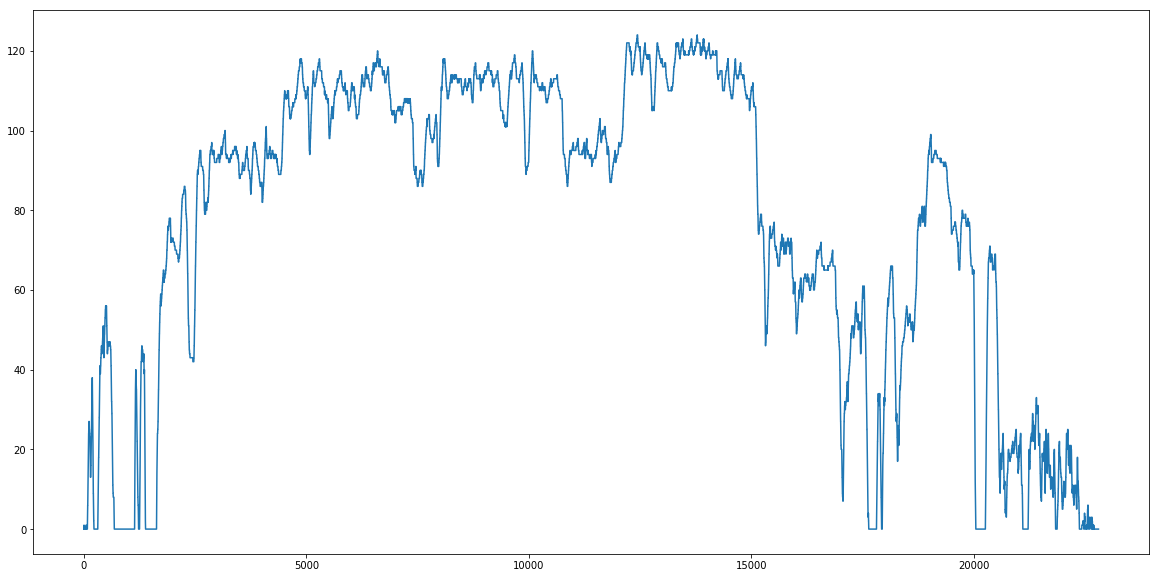

In [0]:
plt.figure(num=None, figsize=(20, 10))
plt.plot(speeds[11])
plt.show()

In [0]:
opened = 0
closed = 0
speeds = []
roads = []
filenames = []
lats = []
lons = []
for filename in os.listdir('data/iX_35_final_nr1'):
    if filename.endswith(".feather"): 
        dirfile = "data/iX_35_final_nr1/" + filename
        data = feather.read_dataframe(dirfile)
        try:
            road = data['road_type']
            speed = 
            print(filename)
            opened +=1
        except:
            print(filename + " couldn't open")
            closed +=1
print(count)

2015-11-04-23-49-00.feather
2018-02-22-09-18-05.feather
2018-09-28-13-09-59.feather
2017-07-10-13-23-03.feather
2016-03-31-13-00-12.feather
2018-01-18-13-44-42.feather
2018-03-12-11-23-11.feather
2016-03-17-06-39-43.feather
2017-04-20-16-42-11.feather
2016-02-22-15-47-50.feather
2017-05-01-07-55-00.feather couldn't open
2016-08-31-11-09-37.feather
2017-04-04-04-17-06.feather
2018-07-31-14-56-48.feather
2016-01-18-08-27-42.feather
2018-06-07-09-47-02.feather
2016-12-23-08-08-14.feather
2017-03-30-13-38-53.feather
2016-03-01-10-48-43.feather
2018-09-12-17-10-36.feather
2016-04-12-15-57-28.feather
2017-05-22-09-32-12.feather
2018-07-20-06-03-47.feather
2015-10-27-16-36-06.feather
2018-07-27-05-58-21.feather
2016-12-16-09-20-10.feather
2017-04-04-14-17-54.feather
2018-06-01-07-52-50.feather
2017-06-13-06-42-28.feather
2017-07-19-04-02-18.feather
2018-02-08-07-48-32.feather
2018-09-12-20-39-29.feather
2017-09-12-06-38-07.feather
2016-12-08-17-20-08.feather
2017-04-10-13-48-28.feather
2017-0

In [0]:
closed

76

In [0]:
filename = '2018-03-19-11-43-16.feather'
dirfile = "data/iX_35_final_nr1/" + filename
data = feather.read_dataframe(dirfile)

In [0]:
filename

'2017-07-10-13-23-03.feather'